In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df_ppp = pd.read_csv('01 PPP sub 150k through 112420.csv', parse_dates=['DateApproved'])

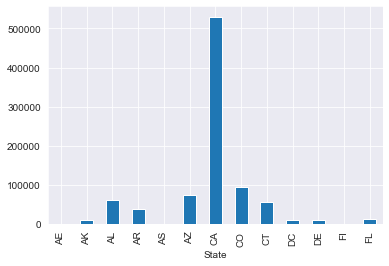

In [3]:
df_ppp.groupby('State').LoanAmount.count().plot(kind='bar')

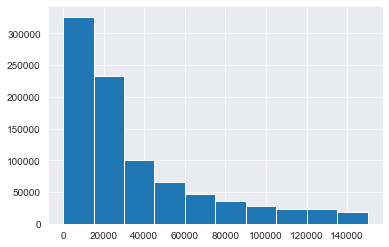

In [4]:
df_ppp.query('State.notna()').LoanAmount.hist()

In [5]:
df_ppp.groupby('Lender').LoanAmount.sum().reset_index().sort_values('LoanAmount', ascending=False).head(10)

,Lender,LoanAmount
204,"Bank of America, National Association",3.471334e+09
1275,"JPMorgan Chase Bank, National Association",2.562182e+09
2447,"Wells Fargo Bank, National Association",2.245700e+09
662,Cross River Bank,1.152502e+09
2327,"U.S. Bank, National Association",1.121892e+09
430,Celtic Bank Corporation,6.982401e+08
670,Customers Bank,6.554427e+08
2505,"Zions Bank, A Division of",6.292339e+08
284,Bank of the West,4.885309e+08
1380,"MUFG Union Bank, National Association",4.849556e+08


In [10]:
df_ppp_jobs = df_ppp.query('JobsReported>=1.0').copy()
df_ppp_jobs['avg_hour_rate'] = df_ppp_jobs.LoanAmount/df_ppp_jobs.JobsReported/(2.5*40)
print ('{:.3f} of loan cases has avarage pay rate less than $30.00/hr.'.format(
    df_ppp_jobs.query('avg_hour_rate<=30').shape[0]/df_ppp_jobs.shape[0]))

0.139 of loan cases has avarage pay rate less than $30.00/hr.


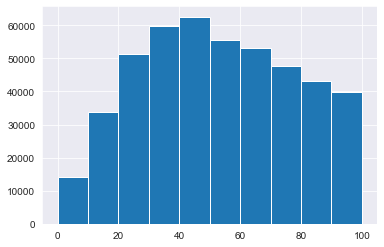

In [11]:
df_ppp_jobs.query('avg_hour_rate<=100').avg_hour_rate.hist()